<a href="https://colab.research.google.com/github/MayanjaJanet/MayanjaJanet.github.io/blob/master/credit_risk_LogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from google.colab import files

import io
from sklearn.preprocessing import LabelEncoder

In [4]:
uploaded= files.upload()


Saving cleaned_data.csv to cleaned_data.csv


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['cleaned_data.csv']))

In [6]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [7]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N
980,LP002989,Male,No,0.0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


In [8]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,956.000000,981.000000,981.000000,954.000000,961.000000,902.000000
mean,0.881799,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,1.255623,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,0.000000,9.000000,6.000000,0.000000
25%,0.000000,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,2.000000,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [9]:
df.shape

(981, 13)

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
df = df.drop(['Loan_ID'],axis=1)

In [12]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
df.nunique()

,0
Gender,2
Married,2
Dependents,5
Education,2
Self_Employed,2
ApplicantIncome,752
CoapplicantIncome,437
LoanAmount,232
Loan_Amount_Term,12
Credit_History,2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            978 non-null    object 
 2   Dependents         956 non-null    float64
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 92.1+ KB


In [15]:
df.isnull().sum()[df.isnull().sum()>0]

,0
Gender,24
Married,3
Dependents,25
Self_Employed,55
LoanAmount,27
Loan_Amount_Term,20
Credit_History,79


In [16]:
df.Dependents.value_counts()

,count
Dependents,
0.0,545
1.0,160
2.0,160
4.0,90
3.0,1


In [17]:
df.Dependents.mean()
df.Dependents= df.Dependents.fillna(df.Dependents.mean())
print(df.Dependents.mean())

0.8817991631799165


In [18]:
df.LoanAmount.value_counts()

,count
LoanAmount,
120.0,29
110.0,27
100.0,24
187.0,21
150.0,19
...,...
218.0,1
62.0,1
53.0,1


In [1]:
df.LoanAmount.mean()
df.LoanAmount= df.LoanAmount.fillna(df.LoanAmount.mean())
print(df.LoanAmount.mean())

NameError: name 'df' is not defined

In [20]:
df.Loan_Amount_Term.value_counts()

,count
Loan_Amount_Term,
360.0,823
180.0,66
480.0,23
300.0,20
240.0,8
84.0,7
120.0,4
60.0,3
36.0,3


In [21]:
df.Loan_Amount_Term.mean()
df.Loan_Amount_Term= df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean())
print(df.Loan_Amount_Term.mean())

342.2018730489074


In [22]:
df.isnull().sum()[df.isnull().sum()>0]

,0
Gender,24
Married,3
Self_Employed,55
Credit_History,79


In [23]:
df.Credit_History.value_counts()


,count
Credit_History,
1.0,754
0.0,148


In [24]:
df.Credit_History= df.Credit_History.fillna('1.0')

In [64]:
df.Self_Employed.value_counts()

,count
Self_Employed,
No,807
Yes,119


In [25]:
df.Self_Employed= df.Self_Employed.fillna('No')

In [66]:
df.Married.value_counts()

,count
Married,
Yes,631
No,347


In [26]:
df.Married= df.Married.fillna('Yes')

In [27]:
df.Gender.value_counts()


,count
Gender,
Male,775
Female,182


In [28]:
df.Gender= df.Gender.fillna('Male')

In [29]:
df.isnull().sum()[df.isnull().sum()>0]

,0


In [30]:
le= LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Married = le.fit_transform(df.Married)
df.Education = le.fit_transform(df.Education)
df.Self_Employed = le.fit_transform (df.Self_Employed)
df.Property_Area = le.fit_transform(df.Property_Area)
df.Loan_Status = le.fit_transform(df.Loan_Status)

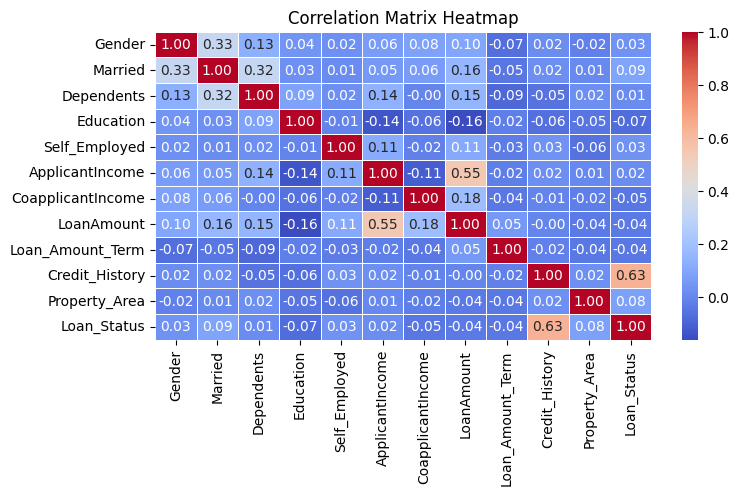

In [31]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 4))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.savefig("map1", dpi=300, bbox_inches="tight")
plt.show()

In [32]:
total_len = len(df['Loan_Status'])
percentage_labels = (df['Loan_Status'].value_counts()/total_len)*100
percentage_labels

,count
Loan_Status,
1,72.579001
0,27.420999


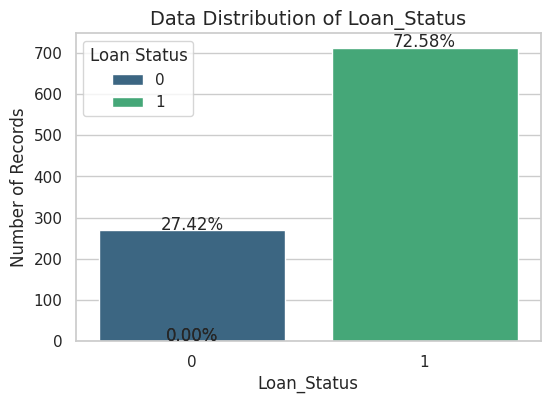

In [33]:
sns.set(style="whitegrid")
total_len = len(df)
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['Loan_Status'],hue=df['Loan_Status'], palette="viridis")
ax.set_title('Data Distribution of Loan_Status', fontsize=14)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + 2,
            f'{100 * height / total_len:.2f}%',
            fontsize=12, ha='center')

ax.set_xlabel("Loan_Status", fontsize=12)
ax.set_ylabel("Number of Records", fontsize=12)
plt.legend(title='Loan Status')
sns.set(font_scale=1.2)
plt.savefig("loan_status.png", dpi=300, bbox_inches="tight")
plt.show()

In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [7]:
df.to_csv('cleaned_data.csv', index=False)

In [9]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss
)


# Define features and target
X = df.drop(columns=["Loan_Status"])
y = df["Loan_Status"]

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for better logistic regression performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model and measure training time
start_time = time.time()
log_model = LogisticRegression(class_weight="balanced", max_iter=500)
log_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time  # Measure training duration

# Make predictions
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for log loss

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Sensitivity
f1 = f1_score(y_test, y_pred)

# Compute specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

# Approximate learning rate using log loss
initial_loss = log_loss(y_train, log_model.predict_proba(X_train_scaled)[:, 1])
final_loss = log_loss(y_test, y_pred_proba)
learning_rate = (initial_loss - final_loss) / initial_loss  # Relative loss reduction

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Learning Rate (Loss Reduction): {learning_rate:.4f}")


Accuracy: 0.8325
Precision: 0.8253
Recall (Sensitivity): 0.9716
Specificity: 0.4821
F1 Score: 0.8925
Training Time: 0.0049 seconds
Learning Rate (Loss Reduction): -0.0563


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assuming you have training data X_train and y_train
# X_train: Features, y_train: Target variable (0 for default, 1 for no default)

# Scaling the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# New applicant data
new_applicant = pd.DataFrame({
    "Gender": [1],
    "Married": [1],
    "Dependents": [1.0],
    "Education": [0],
    "Self_Employed": [0],
    "ApplicantIncome": [4583],
    "CoapplicantIncome": [1508.0],
    "LoanAmount": [128.0],
    "Loan_Amount_Term": [360.0],
    "Credit_History": [1.0],
    "Property_Area": [0]
})

# Scale new applicant's data using the same scaler
new_applicant_scaled = scaler.transform(new_applicant)

# Predict the probability of default (class 0) and no default (class 1) for the new applicant
probabilities = log_reg.predict_proba(new_applicant_scaled)

# Get the probabilities for both classes
prob_default = probabilities[0][0]  # Probability for default (class 0)
prob_no_default = probabilities[0][1]  # Probability for no default (class 1)

# Compare probabilities and choose the class with the higher probability
if prob_default > prob_no_default:
    prediction = 0  # Default (class 0)
    result = "Bad Credit Risk (Default)"
else:
    prediction = 1  # No Default (class 1)
    result = "Good Credit Risk (No Default)"

# Print the result and predicted probabilities
print(f"Prediction for the new applicant: {result}")
print(f"Probability of Default: {prob_default:.4f}")
print(f"Probability of No Default: {prob_no_default:.4f}")


Prediction for the new applicant: Good Credit Risk (No Default)
Probability of Default: 0.1472
Probability of No Default: 0.8528
